<a href="https://colab.research.google.com/github/guilhermeribg/analise_dados1/blob/main/Exerc%C3%ADcio_2_An%C3%A1lise_de_dados_gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercício 2

##ORGANIZANDO A BASE DE DADOS


In [2]:
import pandas as pd
import sqlalchemy

frequencia = pd.read_csv("https://raw.githubusercontent.com/guilhermeribg/analise_dados1/main/senadores.csv")
frequencia.columns = ["código", "classificação", "frequencia_homens", "frequencia_mulheres"]
frequencia.head(10)

,código,classificação,frequencia_homens,frequencia_mulheres
0,2,Excelente,368,350
1,3,Muito bom,550,375
2,4,Bom,426,165
3,5,Razoável,450,360
4,6,Ruim,206,250


In [3]:
#tirar a frequencia relativa

def freq_rel(vetor):
    soma = 0;
    for i in vetor:
      soma = soma + i;
    vetor_freq = [];
    for i in vetor:
      vetor_freq.append(round(i/soma,2));
    return vetor_freq   
  
frequencia_relativa_homens = freq_rel(frequencia["frequencia_homens"])
frequencia_relativa_mulheres = freq_rel(frequencia["frequencia_mulheres"])
print(frequencia_relativa_homens)
print(frequencia_relativa_mulheres)

[0.18, 0.28, 0.21, 0.23, 0.1]
[0.23, 0.25, 0.11, 0.24, 0.17]


In [5]:
frequencia = frequencia.assign(frequencia_relativa_homens=pd.Series(frequencia_relativa_homens))

frequencia = frequencia.assign(frequencia_relativa_mulheres=pd.Series(frequencia_relativa_mulheres))

frequencia

,código,classificação,frequencia_homens,frequencia_mulheres,frequencia_relativa_homens,frequencia_relativa_mulheres
0,2,Excelente,368,350,0.18,0.23
1,3,Muito bom,550,375,0.28,0.25
2,4,Bom,426,165,0.21,0.11
3,5,Razoável,450,360,0.23,0.24
4,6,Ruim,206,250,0.10,0.17


##CONSTRUINDO OS GRÁFICOS


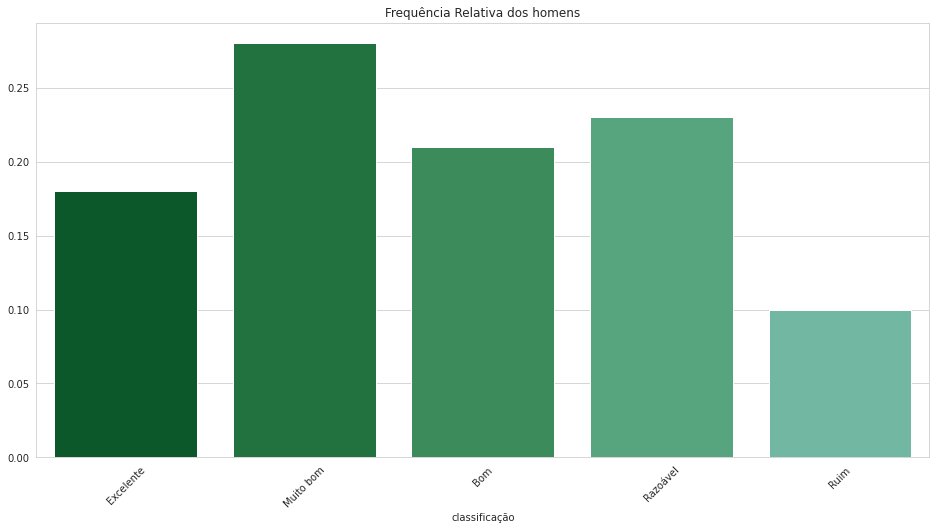

In [8]:
import seaborn as sns  ##vou trabalhar com paletes de cor
import matplotlib.pyplot as plt
sns.set_style("whitegrid")


plt.figure(figsize=(16,8)) ##o primeiro parâmetro é do eixo x e o segundo do y
sns.barplot(
      x= frequencia["classificação"],
      y= frequencia["frequencia_relativa_homens"].values, ##escolhendo o que vai ser no eixo x e no eixo y
      palette=sns.color_palette("BuGn_r", n_colors=len(frequencia) + 4),
)

degrees = 45
plt.xticks(rotation=degrees)
plt.title("Frequência Relativa dos homens")
plt.show()

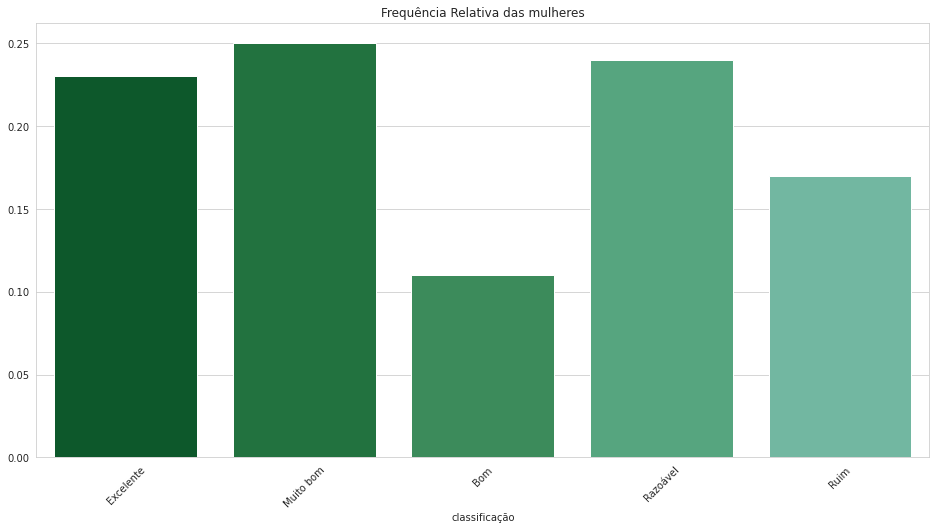

In [9]:
import seaborn as sns  ##vou trabalhar com paletes de cor
import matplotlib.pyplot as plt
sns.set_style("whitegrid")


plt.figure(figsize=(16,8)) ##o primeiro parâmetro é do eixo x e o segundo do y
sns.barplot(
      x= frequencia["classificação"],
      y= frequencia["frequencia_relativa_mulheres"].values, ##escolhendo o que vai ser no eixo x e no eixo y
      palette=sns.color_palette("BuGn_r", n_colors=len(frequencia) + 4),
)

degrees = 45
plt.xticks(rotation=degrees)
plt.title("Frequência Relativa das mulheres")
plt.show()

A representação do gráfico utilizando a frequência relativa facilita na análise dos dados, visto que podemos transformar os valores em porcentagem, ou seja, considerar as diferenças apenas no intervalo de 0 a 1. Os valores absolutos são muito variáveis, de 206 a 550, no caso dos homens, por exemplo, o que pode dificultar a visualização para a análise do gráfico.
